In [1]:
#one-hot encoding
"""
red, green, blue
1,   0,     0
0,   1,     0
0,   0,     1
"""

'\nred, green, blue\n1,   0,     0\n0,   1,     0\n0,   0,     1\n'

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'warm', 'cold', 'warm', 'hot']

values = np.array(data)

print(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'warm' 'cold' 'warm' 'hot']


In [3]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 2 0 2 1]


In [4]:
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [1]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [5]:
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[4, :])])
print(inverted)

['hot']


In [6]:
#Convolutional Neural Network

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

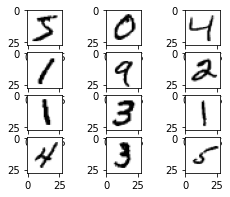

In [9]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [11]:
y_train = to_categorical(y_train) #one-hot encoding
y_test = to_categorical(y_test)

In [12]:
X_train = X_train / 255 #normalizasyon
X_test = X_test / 255

In [13]:
#Keras modelimizi oluşturalım

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

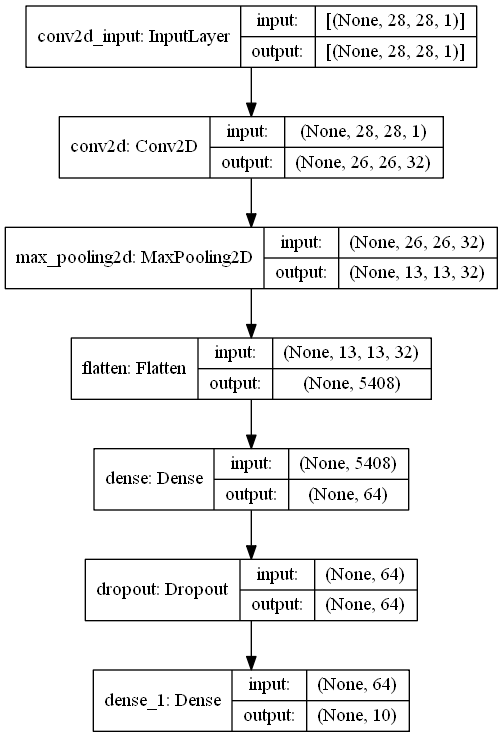

In [15]:
tf.keras.utils.plot_model(model, "vbugroup3-mnist.png", show_shapes = True, show_layer_names = True)

In [16]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["acc"], '--')
plt.plot(history.history["val_acc"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

In [ ]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [ ]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı : %.2f%%" % (performans[1]*100))

In [ ]:
#Recurrent Neural Networks

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing import sequence

In [18]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [19]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [20]:
X_train.shape

(25000, 500)

In [25]:
#Keras modelimizi oluşturalım

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))

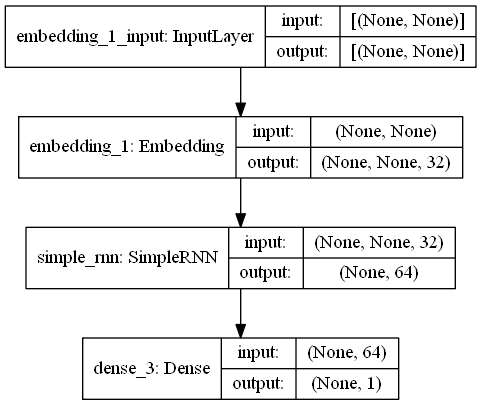

In [26]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "VBU-Group3-RNN.png", show_shapes = True, show_layer_names = True)

In [27]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

In [28]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 39s 2ms/sample - loss: 0.6900 - acc: 0.5321 - val_loss: 0.6740 - val_acc: 0.5910
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.6473 - acc: 0.6616 - val_loss: 0.6536 - val_acc: 0.6142
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.5105 - acc: 0.7854 - val_loss: 0.5028 - val_acc: 0.7598
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.4079 - acc: 0.8255 - val_loss: 0.4170 - val_acc: 0.8268
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.2974 - acc: 0.8771 - val_loss: 0.3712 - val_acc: 0.8418
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.2329 - acc: 0.9104 - val_loss: 0.3673 - val_acc: 0.8416
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.1796 - acc: 0.9372 - val_loss: 0.4

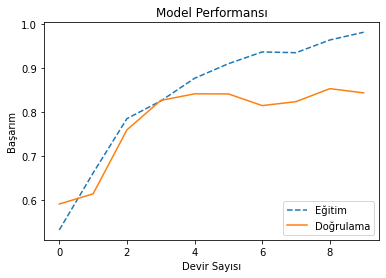

In [29]:
plt.plot(history.history["acc"], '--')
plt.plot(history.history["val_acc"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

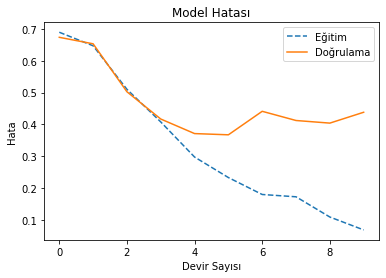

In [30]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [31]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Başarımı : %.2f%%" % (performans[1]*100))

Modelin Başarımı : 84.50%
